# Exploratory Data Analysis (EDA)
The purpose of this stage is to investigate and understand the data before machine learning model building. 
Main tasks at this stage:
1. Import Python packages and load the dataset
2. Explore summary information about the dataset: size, structure, duplicated records, data types, etc.
3. Examine each variable in detail
4. Discover the potential errors/mistakes
5. Investigate the missing values
6. Handle with the outliers
7. Prepare key takeaways about the dataset

### 1. Import Python packages and load the dataset 

In [88]:
# importing all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The dataset contains information about the users of the Waze app and is provided as .csv file.

*Note: This project was created for pedagogical purposes and does not represent Waze’s actual data.*

In [89]:
# loading dataset into a dataframe
df = pd.read_csv('waze_dataset.csv')

### 2. Explore summary information about the dataset: size, structure, duplicated records, data types, etc.

In [90]:
# examining the first 10 rows to understand what data the dataset contains
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


As we see, there are 2 categorical variables and 11 numerical variables in the dataset. Each row represents a record of a separate unique user. The key attribute for my analysis is stored in variable 'label' and includes information about the user status - if user is churned or retained. 

In [91]:
# number of rows and columns in the dataset
df.shape

(14999, 13)

In [92]:
# the number of duplicated rows
df.duplicated().sum()

0

In [93]:
# summary information about the columns: data types and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


The dataset was provided with the description of each variable:
 - 'ID' - a sequential numbered index
 - 'label' - binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month 
 - 'sessions' - The number of occurrence of a user opening the app during the month
 - 'drives' - an occurrence of driving at least 1 km during the month
 - 'total_sessions' - the total number of sessions since a user has onboarded
 - 'n_days_after_onboarding' - the number of days since a user signed up for the app
 - 'total_navigations_fav1' - total navigations since onboarding to the user’s favorite place 1
 - 'total_navigations_fav2' - total navigations since onboarding to the user’s favorite place 2
 - 'driven_km_drives' - total kilometers driven during the month
 - 'duration_minutes_drives' - total duration driven in minutes during the month
 - 'activity_days' - number of days the user opens the app during the month
 - 'driving_days' - number of days the user drives (at least 1 km) during the month
 - 'device' - the type of device a user starts a session with


I'll start by saying that I find it strange that the 'total_sessions' variable has decimal values. By definition, this variable must have integer values. This question should be asked of the dataset owner. And I'll do that after the EDA with the other questions that may come up

Having analyzed the structure of the dataset, I assume that variables 'ID', 'total_navigations_fav1' and 'total_navigations_fav2' are not important for my analysis. To keep only relevant data in the dataset I've decided to remove these columns from the dataset

In [94]:
df = df.drop('ID', axis='columns')
df = df.drop('total_navigations_fav1', axis='columns')
df = df.drop('total_navigations_fav2', axis='columns')
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,retained,283,226,296.748273,2276,2628.845068,1985.775061,28,19,Android
1,retained,133,107,326.896596,1225,13715.920550,3160.472914,13,11,iPhone
2,retained,114,95,135.522926,2651,3059.148818,1610.735904,14,8,Android
3,retained,49,40,67.589221,15,913.591123,587.196542,7,3,iPhone
4,retained,84,68,168.247020,1562,3950.202008,1219.555924,27,18,Android


### 3. Examine each variable in detail

Let's start by analyzing the summary statistics for each numerical variable

In [95]:
# summary stats
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,4039.340921,1860.976012,15.537102,12.179879
std,80.699065,65.913872,136.405128,1008.513876,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,5289.861262,2464.362632,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,21183.401890,15851.727160,31.000000,30.000000


Now I can understand the main statistical parameters for each variable - min, max, quartiles, etc. In addition to that I want to visualize each numerical variable. The best way is to plot histograms to understand their distribution.

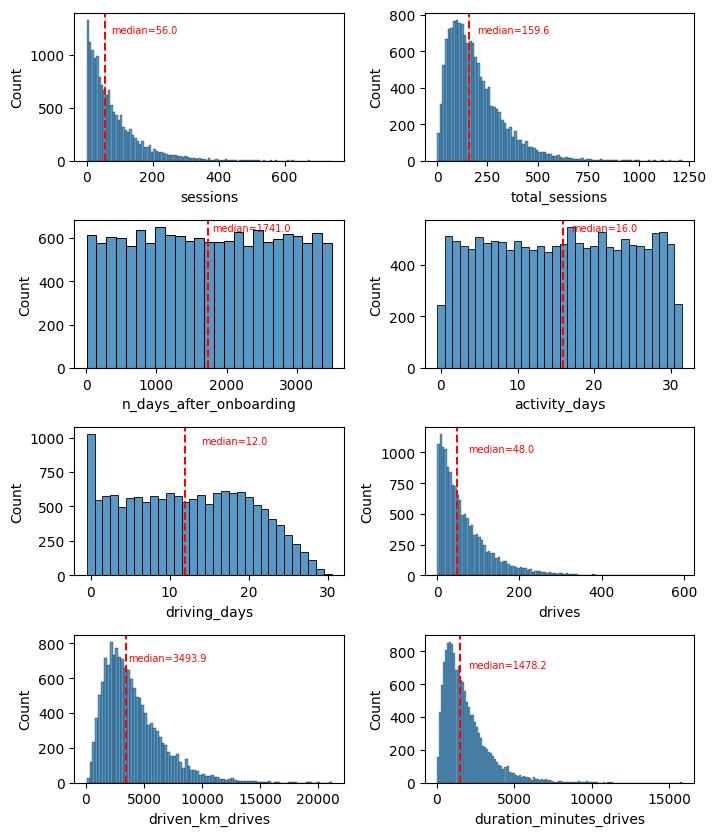

In [96]:
# Histograms
plt.subplots(4,2,figsize=(8,10))

# 'sessions' - the number of occurrence of a user opening the app during the month 
plt.subplot(4,2,1)
sns.histplot(x=df['sessions'])
plt.axvline(df['sessions'].median(), color='red', linestyle='--')
plt.text(75, 1200, 'median='+str(round(df['sessions'].median(),1)), color='red',fontsize=7)

# 'total_sessions' - the total number of sessions since a user has onboarded
plt.subplot(4,2,2)
sns.histplot(x=df['total_sessions'])
plt.axvline(df['total_sessions'].median(), color='red', linestyle='--')
plt.text(200,700, 'median='+str(round(df['total_sessions'].median(),1)), color='red',fontsize=7)

# 'n_days_after_onboarding' - the number of days since a user signed up for the app
plt.subplot(4,2,3)
sns.histplot(x=df['n_days_after_onboarding'])
plt.axvline(df['n_days_after_onboarding'].median(), color='red', linestyle='--')
plt.text(1800,630, 'median='+str(round(df['n_days_after_onboarding'].median(),1)), color='red',fontsize=7)

# 'activity_days' - number of days the user opens the app during the month
plt.subplot(4,2,4)
sns.histplot(x=df['activity_days'],discrete=True)
plt.axvline(df['activity_days'].median(), color='red', linestyle='--')
plt.text(17,530, 'median='+str(round(df['activity_days'].median(),1)), color='red',fontsize=7)

# 'driving_days' - number of days the user drives (at least 1 km) during the month
plt.subplot(4,2,5)
sns.histplot(x=df['driving_days'],discrete=True)
plt.axvline(df['driving_days'].median(), color='red', linestyle='--')
plt.text(14,950, 'median='+str(round(df['driving_days'].median(),1)), color='red',fontsize=7)

# 'drives' - an occurrence of driving at least 1 km during the month
plt.subplot(4,2,6)
sns.histplot(x=df['drives'])
plt.axvline(df['drives'].median(), color='red', linestyle='--')
plt.text(75,1000, 'median='+str(round(df['drives'].median(),1)), color='red',fontsize=7)

# 'driven_km_drives' - total kilometers driven during the month
plt.subplot(4,2,7)
sns.histplot(x=df['driven_km_drives'])
plt.axvline(df['driven_km_drives'].median(), color='red', linestyle='--')
plt.text(3600,700, 'median='+str(round(df['driven_km_drives'].median(),1)), color='red',fontsize=7)

# 'duration_minutes_drives' - total duration driven in minutes during the month
plt.subplot(4,2,8)
sns.histplot(x=df['duration_minutes_drives'])
plt.axvline(df['duration_minutes_drives'].median(), color='red', linestyle='--')
plt.text(2000,700, 'median='+str(round(df['duration_minutes_drives'].median(),1)), color='red',fontsize=7)

plt.subplots_adjust(hspace=0.4,wspace=0.3)
plt.show()

As I see, the numerical variables are either very right-skewed or uniformly distributed. For the right-skewed distributions, this means that most users have values in the lower end of the range for that variable. For the uniform distributions, this means that users are generally equally likely to have values anywhere within the range for that variable

Now let's investigate categorical variables. For them, histograms are inefficient. So I'll plot pie charts

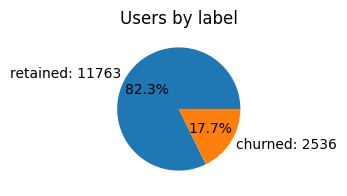

In [97]:
# 'label' - binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month
fig = plt.figure(figsize=(2,2))
data=df['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Users by label');

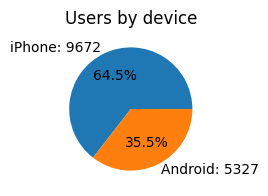

In [98]:
# 'device' - the type of device a user starts a session with
fig = plt.figure(figsize=(2,2))
data=df['device'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Users by device');

As I see here, almost 18% of users were churned in the last month and 82% were retained. Most of the Waze users use iPhones (64,5%) and only 35,5% use Android devices

### 4. Discover the potential errors/mistakes

After the initial investigation of the dataset, I have noticed a few points that seem to be strange or suspicious for me as a Data Analyst. I want to examine them in detail. First of all, I call a method describe() one more time

In [99]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,4039.340921,1860.976012,15.537102,12.179879
std,80.699065,65.913872,136.405128,1008.513876,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,5289.861262,2464.362632,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,21183.401890,15851.727160,31.000000,30.000000


The first point that I mentioned early is about a 'total_sessions' variable that must has integer values but not decimal. This point should be discussed with the owner of the dataset.

The second point is that the maximum values ​​for the variables 'activity_days' and 'driving_days' are different - 31 and 30 days, respectively. It is surprising that none of the 15,000 users drives 31 days a month. It is possible that the values ​​in these 2 columns were stored in different months. This should also be discussed with the dataset owner

The next point I want to check in detail is the zero values of variables 'sessions', 'drives', 'activity_days', and 'driving_days'. As some variables are connected (for instance, 'sessions', 'total_sessions' and 'activity_days' OR 'drives', 'driven_km_drives' and 'driving_days' etc.) I want to check if there are some mistakes there

In [100]:
df[df['sessions']==0]

,label,sessions,drives,total_sessions,n_days_after_onboarding,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
25,retained,0,0,139.194969,2731,5702.339466,4582.737478,6,2,Android
97,retained,0,0,559.547112,2879,6668.844350,3511.370419,28,24,Android
217,retained,0,0,33.710210,629,6103.881670,1767.846528,8,2,iPhone
339,retained,0,0,0.220211,347,2520.850896,1539.318152,20,15,iPhone
485,NaN,0,0,90.747466,579,1363.206140,66.588493,15,11,iPhone
...,...,...,...,...,...,...,...,...,...,...
14411,retained,0,0,472.078785,1746,3148.136679,1685.365455,20,18,Android
14549,retained,0,0,96.781778,2732,1394.604767,573.591169,18,10,iPhone
14562,retained,0,0,20.067490,1355,1805.177261,271.398262,23,17,iPhone
14668,retained,0,0,5.626862,592,7959.247975,869.674910,13,9,Android


Ok, it's a strange fact that 105 users have 0 sessions in a month, but their activity_days and drive_days are not equal to 0. This seems to be a mistake. By definition, the number of sessions must be greater than the number of active days. If the user opens the app only once a day, the number of sessions will be equal to the number of days of activity.

Let's check other zero values

In [101]:
df[df['drives']==0]

,label,sessions,drives,total_sessions,n_days_after_onboarding,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
25,retained,0,0,139.194969,2731,5702.339466,4582.737478,6,2,Android
97,retained,0,0,559.547112,2879,6668.844350,3511.370419,28,24,Android
217,retained,0,0,33.710210,629,6103.881670,1767.846528,8,2,iPhone
339,retained,0,0,0.220211,347,2520.850896,1539.318152,20,15,iPhone
485,NaN,0,0,90.747466,579,1363.206140,66.588493,15,11,iPhone
...,...,...,...,...,...,...,...,...,...,...
14411,retained,0,0,472.078785,1746,3148.136679,1685.365455,20,18,Android
14549,retained,0,0,96.781778,2732,1394.604767,573.591169,18,10,iPhone
14562,retained,0,0,20.067490,1355,1805.177261,271.398262,23,17,iPhone
14668,retained,0,0,5.626862,592,7959.247975,869.674910,13,9,Android


Here it is the same case - 106 users have 0 drives per month and at the same time the number of driving days, distance and duration of drives are not equal to 0.

In [102]:
df[df['activity_days']==0]

,label,sessions,drives,total_sessions,n_days_after_onboarding,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
14,churned,72,66,401.351809,2524,5922.811202,2227.280393,0,0,Android
56,churned,150,127,187.708346,2028,1396.461977,496.620891,0,0,iPhone
102,retained,113,91,236.294981,1031,2810.720839,1245.591383,0,0,iPhone
115,retained,40,32,52.760087,314,1724.225763,904.478542,0,0,iPhone
255,retained,263,216,271.599951,1696,5096.151630,944.766068,0,0,iPhone
...,...,...,...,...,...,...,...,...,...,...
14375,retained,103,83,196.769055,863,4899.172576,3494.836880,0,0,iPhone
14753,churned,249,205,294.162652,424,652.754712,388.985099,0,0,Android
14805,retained,83,66,301.074813,1027,1310.982507,666.332898,0,0,iPhone
14988,churned,13,11,41.804981,770,1533.521450,823.418616,0,0,Android


In [103]:
df[df['driving_days']==0]

,label,sessions,drives,total_sessions,n_days_after_onboarding,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
13,retained,80,64,132.830506,3154,8531.248070,6324.273457,1,0,Android
14,churned,72,66,401.351809,2524,5922.811202,2227.280393,0,0,Android
56,churned,150,127,187.708346,2028,1396.461977,496.620891,0,0,iPhone
64,retained,4,3,113.818787,1830,9624.439528,3213.049582,6,0,Android
81,churned,26,23,83.166886,2118,944.204641,455.026306,2,0,Android
...,...,...,...,...,...,...,...,...,...,...
14881,retained,174,151,181.187455,2255,2647.541976,561.344796,2,0,iPhone
14957,retained,24,24,42.953281,762,1466.793380,597.834311,2,0,Android
14985,churned,53,43,118.385655,65,1661.143357,1161.205518,4,0,iPhone
14988,churned,13,11,41.804981,770,1533.521450,823.418616,0,0,Android


We have similar cases here. Activity_days and driving_days are 0, but sessions and drives are not 0. This seems to be an error. These questions should be asked of the dataset owner.

As we can see, many variables are interrelated. Let's find out what possible errors can occur here.
Let's start with the number of sessions and the number of activity_days. As I said earlier, by definition the number of sessions must be greater than the number of activity_days.

In [104]:
df[df['sessions']<df['activity_days']]

,label,sessions,drives,total_sessions,n_days_after_onboarding,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
6,retained,3,2,236.725314,360,5249.172828,726.577205,28,23,iPhone
24,retained,3,3,50.328214,1084,2274.207173,1650.575799,16,10,Android
25,retained,0,0,139.194969,2731,5702.339466,4582.737478,6,2,Android
27,churned,5,5,215.876461,2465,925.030474,490.534675,16,8,iPhone
37,retained,16,14,103.894115,443,8786.114497,7181.044427,19,19,Android
...,...,...,...,...,...,...,...,...,...,...
14963,retained,11,10,17.978037,2753,1308.718936,364.433462,18,14,iPhone
14975,retained,27,23,43.388829,861,3322.527150,2266.100825,29,21,Android
14981,retained,17,13,53.736830,1629,3134.000748,753.588602,21,16,iPhone
14987,retained,3,3,16.783501,1282,2144.131445,1113.165436,25,23,iPhone


Ok, we have 2458 users who have fewer sessions than activity_days. This is not good.

The same stuff we have with the variables 'drives' and 'driving_days'. By the definition, the number of drives must be greater than the number of driving_days.

In [105]:
df[df['drives']<df['driving_days']]

,label,sessions,drives,total_sessions,n_days_after_onboarding,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
6,retained,3,2,236.725314,360,5249.172828,726.577205,28,23,iPhone
24,retained,3,3,50.328214,1084,2274.207173,1650.575799,16,10,Android
25,retained,0,0,139.194969,2731,5702.339466,4582.737478,6,2,Android
27,churned,5,5,215.876461,2465,925.030474,490.534675,16,8,iPhone
37,retained,16,14,103.894115,443,8786.114497,7181.044427,19,19,Android
...,...,...,...,...,...,...,...,...,...,...
14937,churned,8,6,258.279602,459,7173.699948,2512.000330,12,10,iPhone
14963,retained,11,10,17.978037,2753,1308.718936,364.433462,18,14,iPhone
14981,retained,17,13,53.736830,1629,3134.000748,753.588602,21,16,iPhone
14987,retained,3,3,16.783501,1282,2144.131445,1113.165436,25,23,iPhone


A similar result - 2167 users have fewer drives than driving_days. It's strange.

Now I want to check the variables 'activity_days' and 'driving_days'. The number of driving_days must be less than the number of activity_days, because users can open the app to check the route, change settings or even by mistake.

In [106]:
df[df['activity_days']<df['driving_days']]

,label,sessions,drives,total_sessions,n_days_after_onboarding,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device


Ok, there are no users who have fewer activity_days than driving_days and it is correct.

So I have a lot of questions for the dataset owner. I found a lot of suspicious things, and before I use this data set to build a machine learning model, I want to make sure the data is correct.

### 5. Investigate the missing values

Let's check if the dataset contains missing values, which columns contain missing values, and how many rows contain missing values

In [107]:
df.isnull().sum()

label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

OK, the missing values ​​are only present in the 'label' variable, and the dataset has 700 rows with empty labels.

The next step is to understand whether the missing data are meaningful to our analysis or not. To do this, I compare the summary statistics of the 700 rows that have missing values ​​in the 'label' variable with the summary statistics of the rows that have no missing values

In [108]:
# Rows with null values
label_empty=df[pd.isnull(df['label'])]

# Summary stats of rows with null values
label_empty.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,80.837143,67.798571,198.483348,1709.295714,3935.967029,1795.123358,15.382857,12.125714
std,79.987440,65.271926,140.561715,1005.306562,2443.107121,1419.242246,8.772714,7.626373
min,0.000000,0.000000,5.582648,16.000000,290.119811,66.588493,0.000000,0.000000
25%,23.000000,20.000000,94.056340,869.000000,2119.344818,779.009271,8.000000,6.000000
50%,56.000000,47.500000,177.255925,1650.500000,3421.156721,1414.966279,15.000000,12.000000
75%,112.250000,94.000000,266.058022,2508.750000,5166.097373,2443.955404,23.000000,18.000000
max,556.000000,445.000000,1076.879741,3498.000000,15135.391280,9746.253023,31.000000,30.000000


In [109]:
# Rows without null values
label_full=df[pd.notnull(df['label'])]

# Summary stats of rows without null values
label_full.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,80.623820,67.255822,189.547409,1751.822505,4044.401535,1864.199794,15.544653,12.182530
std,80.736502,65.947295,136.189764,1008.663834,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.220211,4.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,2217.319909,840.181344,8.000000,5.000000
50%,56.000000,48.000000,158.718571,1749.000000,3496.545617,1479.394387,16.000000,12.000000
75%,111.000000,93.000000,253.540450,2627.500000,5299.972162,2466.928876,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,21183.401890,15851.727160,31.000000,30.000000


Comparing the above tables, there are no significant differences in the main statistical indicators of the two data sets. This means that there will be no significant impact on the outcome of the analysis if we include or do not include this data in further analysis

Next, I compare the two datasets with respect to the 'device' variable.

In [110]:
# Percentage of iPhone and Android users in rows with null values
label_empty['device'].value_counts(normalize=True)

device
iPhone     0.638571
Android    0.361429
Name: proportion, dtype: float64

In [111]:
# Percentage of iPhone and Android users in full dataset
df['device'].value_counts(normalize=True)

device
iPhone     0.644843
Android    0.355157
Name: proportion, dtype: float64

As we see, the percentage of missing values by each device is consistent with their representation in the dataset overall.

So I can suggest that there are no patterns in the appearance of the missing values and they appear randomly.

There are 3 ways to deal with missing values: keep them, delete them or reassign them. As missing data hasn't a significant impact on the stat summary of dataset and they appear randomly, I decide to keep them.

### 6. Handle with the outliers

When I plotted the histograms for each variable, I saw that 5 of them had a right-tailed distribution. These variables appear to have many abnormal values. The best way to examine outliers is to examine the distribution of important variables using box plots

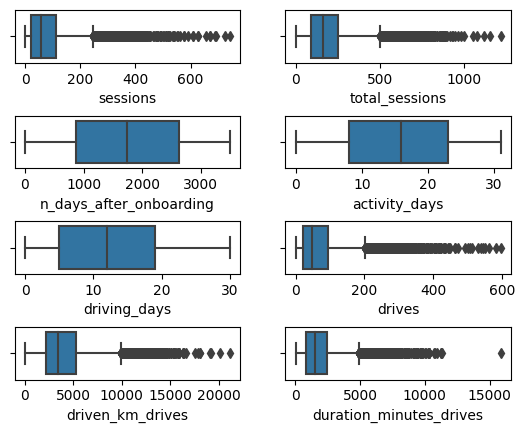

In [112]:
# Box plots

# 'sessions' - the number of occurrence of a user opening the app during the month 
plt.subplot(4,2,1)
sns.boxplot(x=df['sessions'])

# 'total_sessions' - the total number of sessions since a user has onboarded
plt.subplot(4,2,2)
sns.boxplot(x=df['total_sessions'])

# 'n_days_after_onboarding' - the number of days since a user signed up for the app
plt.subplot(4,2,3)
sns.boxplot(x=df['n_days_after_onboarding'])

# 'activity_days' - the number of days the user opens the app during the month
plt.subplot(4,2,4)
sns.boxplot(x=df['activity_days'])

# 'driving_days' - the number of days the user drives (at least 1 km) during the month
plt.subplot(4,2,5)
sns.boxplot(x=df['driving_days'])

# 'drives' - an occurrence of driving at least 1 km during the month
plt.subplot(4,2,6)
sns.boxplot(x=df['drives'])

# 'driven_km_drives' - total kilometers driven during the month
plt.subplot(4,2,7)
sns.boxplot(x=df['driven_km_drives'])

# 'duration_minutes_drives' - total duration driven in minutes during the month
plt.subplot(4,2,8)
sns.boxplot(x=df['duration_minutes_drives'])

plt.subplots_adjust(hspace=1)
plt.show()

Yes, as we can see, variables 'sessions', 'total_sessions', 'drives', 'driven_km_drives', and 'duration_minutes_drives' have a lot of outliers. However having analyzed the distribution of each of these variables early, I saw that these outliers are not data entry errors, they are present because of the right-skewed distributions.

As I will use this data for the building the machine learning model, I decide to reassign these outliers by setting a threshold based on a 95% percentile of the distribution. For that, I create a function and run it for each of these 5 variables.

In [117]:
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = df[column_name].quantile(percentile)
    # Impute threshold for values > than threshold
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

In [118]:
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']:
               outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999998


Now the summary statistics of the dataset and the mean values of 5 right-skewed variables changed.

In [119]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,76.568705,64.058204,184.031320,1749.837789,3939.632764,1789.647426,15.537102,12.179879
std,67.297958,55.306924,118.600463,1008.513876,2216.041510,1222.705167,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,5289.861262,2464.362632,23.000000,19.000000
max,243.000000,201.000000,454.363204,3500.000000,8889.794236,4668.899349,31.000000,30.000000


Let's plot boxplots one more time to prove it.

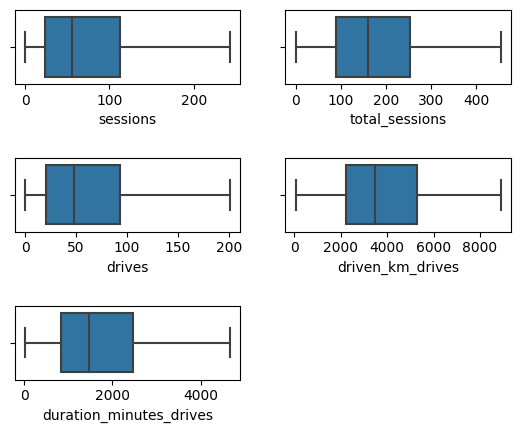

In [130]:
# Box plots

# 'sessions' - the number of occurrence of a user opening the app during the month 
plt.subplot(3,2,1)
sns.boxplot(x=df['sessions'])

# 'total_sessions' - the total number of sessions since a user has onboarded
plt.subplot(3,2,2)
sns.boxplot(x=df['total_sessions'])

# 'drives' - an occurrence of driving at least 1 km during the month
plt.subplot(3,2,3)
sns.boxplot(x=df['drives'])

# 'driven_km_drives' - total kilometers driven during the month
plt.subplot(3,2,4)
sns.boxplot(x=df['driven_km_drives'])

# 'duration_minutes_drives' - total duration driven in minutes during the month
plt.subplot(3,2,5)
sns.boxplot(x=df['duration_minutes_drives'])

plt.subplots_adjust(hspace=1)
plt.show()

Now it looks much better.

### 7. Prepare key takeaways about the dataset

Let's start by grouping the datasets by variable 'label' and compare the medians of each variable for churned and retained users. The reason for calculating the median and not the mean is that I don't want to take outliers or reassigned thresholds into account

In [113]:
# The medians for grouped data by `label`
group_label_median=df.groupby(['label']).median(numeric_only=True)
group_label_median

,sessions,drives,total_sessions,n_days_after_onboarding,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,
churned,59.0,50.0,164.339042,1321.0,3652.655666,1607.183785,8.0,6.0
retained,56.0,47.0,157.586756,1843.0,3464.684614,1458.046141,17.0,14.0


As a result, I have got an interesting snapshot of the two groups of users, churned vs. retained:

Users who churned averaged ~3 more drives in the last month than retained users, but retained users used the app on over twice as many days as churned users in the same time period.

The median churned user drove ~200 more kilometers and 2.5 more hours during the last month than the median retained user.

It seems that churned users had more drives in fewer days, and their trips were farther and longer in duration. There is a probability that the big part of churned users are the truck drivers and maybe they have other requirements and expectations of the Waze app.

Next, I calculate additional variables that help me better describe and understand user behavior

In [114]:
# The median kilometers per drive in the last month for both retained and churned users
group_label_median['Median kilometers per drive']=group_label_median['driven_km_drives']/group_label_median['drives']
group_label_median['Median kilometers per driving day']=group_label_median['driven_km_drives']/group_label_median['driving_days']
group_label_median['Median number of drives per driving day']=group_label_median['drives']/group_label_median['driving_days']
group_label_median

,sessions,drives,total_sessions,n_days_after_onboarding,driven_km_drives,duration_minutes_drives,activity_days,driving_days,Median kilometers per drive,Median kilometers per driving day,Median number of drives per driving day
label,,,,,,,,,,,
churned,59.0,50.0,164.339042,1321.0,3652.655666,1607.183785,8.0,6.0,73.053113,608.775944,8.333333
retained,56.0,47.0,157.586756,1843.0,3464.684614,1458.046141,17.0,14.0,73.716694,247.477472,3.357143


The median user who churned drove 608 kilometers each day they drove last month, which is almost 250% the per-drive-day distance of retained users. The median churned user had a similarly disproporionate number of drives per drive day compared to retained users.

Now I want to plot a histogram to represent the churn rate for each number of driving days.

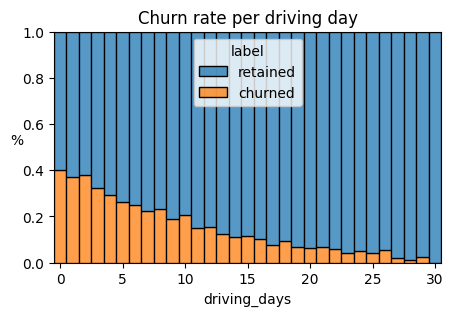

In [124]:
# Histogram
plt.figure(figsize=(5,3))
sns.histplot(data=df,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day');

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

Next, I examine whether there is an imbalance in how many users churned by device type.

In [127]:
# The percentage of Android and iPhone users in each group of users
df.groupby('device')['label'].value_counts(normalize=True)

device   label   
Android  retained    0.824399
         churned     0.175601
iPhone   retained    0.821680
         churned     0.178320
Name: proportion, dtype: float64

The ratio of churned and retained users is consistent between the iPhone group and the Android group, and those ratios are both consistent with the ratio found in the overall dataset.

### Key insights of EDA:
1. The dataset given by the client contains 13 variables that represent the main characteristics of 14999 unique users.
2. The dataset contains 82% retained users and 18% churned users
3. 700 users can't be classified as retained or churned because of the absence of information about their status in column 'label'. Regardless of that, there is no evidence that this missing information has non-random causes of appearance. 
4. There are a few questions for the dataset owner about the data stored in the dataset. 
5. Some variables in the dataset contain a lot of abnormal values. It caused by the right-skewed distribution of these variables. All outliers were reassigned by a threshold based on a 95% percentile of the distribution. 
6. There is a significant difference in the behavior of churned and retained users. 
 - Churned users averaged ~3 more drives in the last month than retained users.
 - Retained users used the app on over twice as many days as churned users in the last month.
 - The median churned user drove ~200 more kilometers and 2.5 more hours during the last month than the median retained user. 
 - The median user who churned drove 608 kilometers each day they drove last month, which is almost 250% the per-drive-day distance of retained users.
I can suggest that there are a lot of truckers among the churned users. As they are different from usual commuters, Waze should investigate their requirements and expectations of the Waze app in more detail. It could help to reduce the churn of users and increase the satisfaction rate of the Waze app.  
7. It is clear from the analysis that, regardless of whether a user churned or not, the users represented in this dataset are serious drivers. It would probably be safe to assume that this data does not represent typical drivers or commuters in general. According to the fact how much these users drive, I would recommend to to gather more data on these super-drivers. It's possible that the reason for their driving so much is also the reason why the Waze app does not meet their specific set of needs, which may differ from the needs of a more typical driver, such as a commuter. 